# Project: Lower Back Pain Identification

Dataset:https://www.kaggle.com/sammy123/lower-back-pain-symptoms-dataset/version/1

In [2]:
#importing necessary libraries
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [3]:
df=pd.read_csv("Dataset_spine.csv")

In [4]:
df.head(5)

,Col1,Col2,Col3,Col4,Col5,Col6,Col7,Col8,Col9,Col10,Col11,Col12,Class_att,Unnamed: 13
0,63.027817,22.552586,39.609117,40.475232,98.672917,-0.254400,0.744503,12.5661,14.5386,15.30468,-28.658501,43.5123,Abnormal,NaN
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259,0.415186,12.8874,17.5323,16.78486,-25.530607,16.1102,Abnormal,NaN
2,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317,0.474889,26.8343,17.4861,16.65897,-29.031888,19.2221,Abnormal,Prediction is done by using binary classificat...
3,69.297008,24.652878,44.311238,44.644130,101.868495,11.211523,0.369345,23.5603,12.7074,11.42447,-30.470246,18.8329,Abnormal,NaN
4,49.712859,9.652075,28.317406,40.060784,108.168725,7.918501,0.543360,35.4940,15.9546,8.87237,-16.378376,24.9171,Abnormal,NaN


In [5]:
df.drop('Unnamed: 13',axis=1,inplace=True)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 310 entries, 0 to 309
Data columns (total 13 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Col1       310 non-null    float64
 1   Col2       310 non-null    float64
 2   Col3       310 non-null    float64
 3   Col4       310 non-null    float64
 4   Col5       310 non-null    float64
 5   Col6       310 non-null    float64
 6   Col7       310 non-null    float64
 7   Col8       310 non-null    float64
 8   Col9       310 non-null    float64
 9   Col10      310 non-null    float64
 10  Col11      310 non-null    float64
 11  Col12      310 non-null    float64
 12  Class_att  310 non-null    object 
dtypes: float64(12), object(1)
memory usage: 31.6+ KB


In [7]:
df.head(5)

,Col1,Col2,Col3,Col4,Col5,Col6,Col7,Col8,Col9,Col10,Col11,Col12,Class_att
0,63.027817,22.552586,39.609117,40.475232,98.672917,-0.254400,0.744503,12.5661,14.5386,15.30468,-28.658501,43.5123,Abnormal
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259,0.415186,12.8874,17.5323,16.78486,-25.530607,16.1102,Abnormal
2,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317,0.474889,26.8343,17.4861,16.65897,-29.031888,19.2221,Abnormal
3,69.297008,24.652878,44.311238,44.644130,101.868495,11.211523,0.369345,23.5603,12.7074,11.42447,-30.470246,18.8329,Abnormal
4,49.712859,9.652075,28.317406,40.060784,108.168725,7.918501,0.543360,35.4940,15.9546,8.87237,-16.378376,24.9171,Abnormal


In [8]:
df.isnull().values.any()

False

In [9]:
df.describe()

,Col1,Col2,Col3,Col4,Col5,Col6,Col7,Col8,Col9,Col10,Col11,Col12
count,310.000000,310.000000,310.000000,310.000000,310.000000,310.000000,310.000000,310.000000,310.000000,310.000000,310.000000,310.000000
mean,60.496653,17.542822,51.930930,42.953831,117.920655,26.296694,0.472979,21.321526,13.064511,11.933317,-14.053139,25.645981
std,17.236520,10.008330,18.554064,13.423102,13.317377,37.559027,0.285787,8.639423,3.399713,2.893265,12.225582,10.450558
min,26.147921,-6.554948,14.000000,13.366931,70.082575,-11.058179,0.003220,7.027000,7.037800,7.030600,-35.287375,7.007900
25%,46.430294,10.667069,37.000000,33.347122,110.709196,1.603727,0.224367,13.054400,10.417800,9.541140,-24.289522,17.189075
50%,58.691038,16.357689,49.562398,42.404912,118.268178,11.767934,0.475989,21.907150,12.938450,11.953835,-14.622856,24.931950
75%,72.877696,22.120395,63.000000,52.695888,125.467674,41.287352,0.704846,28.954075,15.889525,14.371810,-3.497094,33.979600
max,129.834041,49.431864,125.742385,121.429566,163.071041,418.543082,0.998827,36.743900,19.324000,16.821080,6.972071,44.341200


In [10]:
#renaming columns
df=df.rename(columns={'Col1':'pelvic_incidence',
                      'Col2':'pelvic tilt',
                      'Col3':'lumbar_lordosis_angle',
                      'Col4':'sacral_slope',
                      'Col5':'pelvic_radius',
                      'Col6':'degree_spondylolisthesis',
                      'Col7':'pelvic_slope',
                      'Col8':'Direct_tilt',
                      'Col9':'thoracic_slope',
                      'Col10':'cervical_tilt',
                      'Col11':'sacrum_angle',
                      'Col12':'scoliosis_slope', 
                      'Class_att':'target'})

In [11]:
df.head(5)

,pelvic_incidence,pelvic tilt,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,pelvic_slope,Direct_tilt,thoracic_slope,cervical_tilt,sacrum_angle,scoliosis_slope,target
0,63.027817,22.552586,39.609117,40.475232,98.672917,-0.254400,0.744503,12.5661,14.5386,15.30468,-28.658501,43.5123,Abnormal
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259,0.415186,12.8874,17.5323,16.78486,-25.530607,16.1102,Abnormal
2,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317,0.474889,26.8343,17.4861,16.65897,-29.031888,19.2221,Abnormal
3,69.297008,24.652878,44.311238,44.644130,101.868495,11.211523,0.369345,23.5603,12.7074,11.42447,-30.470246,18.8329,Abnormal
4,49.712859,9.652075,28.317406,40.060784,108.168725,7.918501,0.543360,35.4940,15.9546,8.87237,-16.378376,24.9171,Abnormal


In [12]:
df.target.value_counts()

Abnormal    210
Normal      100
Name: target, dtype: int64

C:\Users\meghn\anaconda3\envs\backpain\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


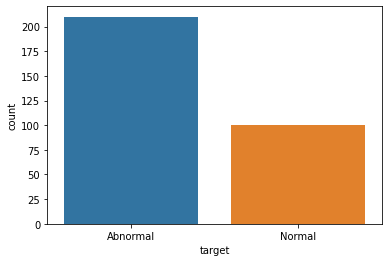

In [13]:
sns.countplot(df.target);

In [14]:
df.target=df.target.astype('category')

In [15]:
df.target=df.target.cat.codes

In [16]:
df

,pelvic_incidence,pelvic tilt,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,pelvic_slope,Direct_tilt,thoracic_slope,cervical_tilt,sacrum_angle,scoliosis_slope,target
0,63.027817,22.552586,39.609117,40.475232,98.672917,-0.254400,0.744503,12.5661,14.5386,15.30468,-28.658501,43.5123,0
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259,0.415186,12.8874,17.5323,16.78486,-25.530607,16.1102,0
2,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317,0.474889,26.8343,17.4861,16.65897,-29.031888,19.2221,0
3,69.297008,24.652878,44.311238,44.644130,101.868495,11.211523,0.369345,23.5603,12.7074,11.42447,-30.470246,18.8329,0
4,49.712859,9.652075,28.317406,40.060784,108.168725,7.918501,0.543360,35.4940,15.9546,8.87237,-16.378376,24.9171,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
305,47.903565,13.616688,36.000000,34.286877,117.449062,-4.245395,0.129744,7.8433,14.7484,8.51707,-15.728927,11.5472,1
306,53.936748,20.721496,29.220534,33.215251,114.365845,-0.421010,0.047913,19.1986,18.1972,7.08745,6.013843,43.8693,1
307,61.446597,22.694968,46.170347,38.751628,125.670725,-2.707880,0.081070,16.2059,13.5565,8.89572,3.564463,18.4151,1
308,45.252792,8.693157,41.583126,36.559635,118.545842,0.214750,0.159251,14.7334,16.0928,9.75922,5.767308,33.7192,1


In [17]:
#correlation between independent variables
df.corr()

,pelvic_incidence,pelvic tilt,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,pelvic_slope,Direct_tilt,thoracic_slope,cervical_tilt,sacrum_angle,scoliosis_slope,target
pelvic_incidence,1.000000,0.629199,0.717282,0.814960,-0.247467,0.638743,0.043290,-0.078411,-0.089740,0.016750,0.019240,-0.007251,-0.353336
pelvic tilt,0.629199,1.000000,0.432764,0.062345,0.032668,0.397862,0.008852,-0.072119,-0.063394,0.028931,0.032859,-0.056550,-0.326063
lumbar_lordosis_angle,0.717282,0.432764,1.000000,0.598387,-0.080344,0.533667,0.029486,-0.112939,-0.063582,0.063875,0.057199,-0.049054,-0.312484
sacral_slope,0.814960,0.062345,0.598387,1.000000,-0.342128,0.523557,0.048988,-0.046914,-0.067968,-0.000063,0.000207,0.032853,-0.210602
pelvic_radius,-0.247467,0.032668,-0.080344,-0.342128,1.000000,-0.026065,0.015767,0.063433,0.060477,-0.039800,0.029738,-0.030145,0.309857
degree_spondylolisthesis,0.638743,0.397862,0.533667,0.523557,-0.026065,1.000000,0.085925,-0.063812,-0.057286,0.056576,0.023021,-0.041023,-0.443687
pelvic_slope,0.043290,0.008852,0.029486,0.048988,0.015767,0.085925,1.000000,0.012694,-0.011770,0.088017,0.060743,-0.073893,-0.055865
Direct_tilt,-0.078411,-0.072119,-0.112939,-0.046914,0.063433,-0.063812,0.012694,1.000000,0.009887,0.072738,-0.037428,-0.024021,0.039591
thoracic_slope,-0.089740,-0.063394,-0.063582,-0.067968,0.060477,-0.057286,-0.011770,0.009887,1.000000,0.052451,0.011354,0.009541,0.049354
cervical_tilt,0.016750,0.028931,0.063875,-0.000063,-0.039800,0.056576,0.088017,0.072738,0.052451,1.000000,0.057451,0.021243,-0.100044


## Feature engineering

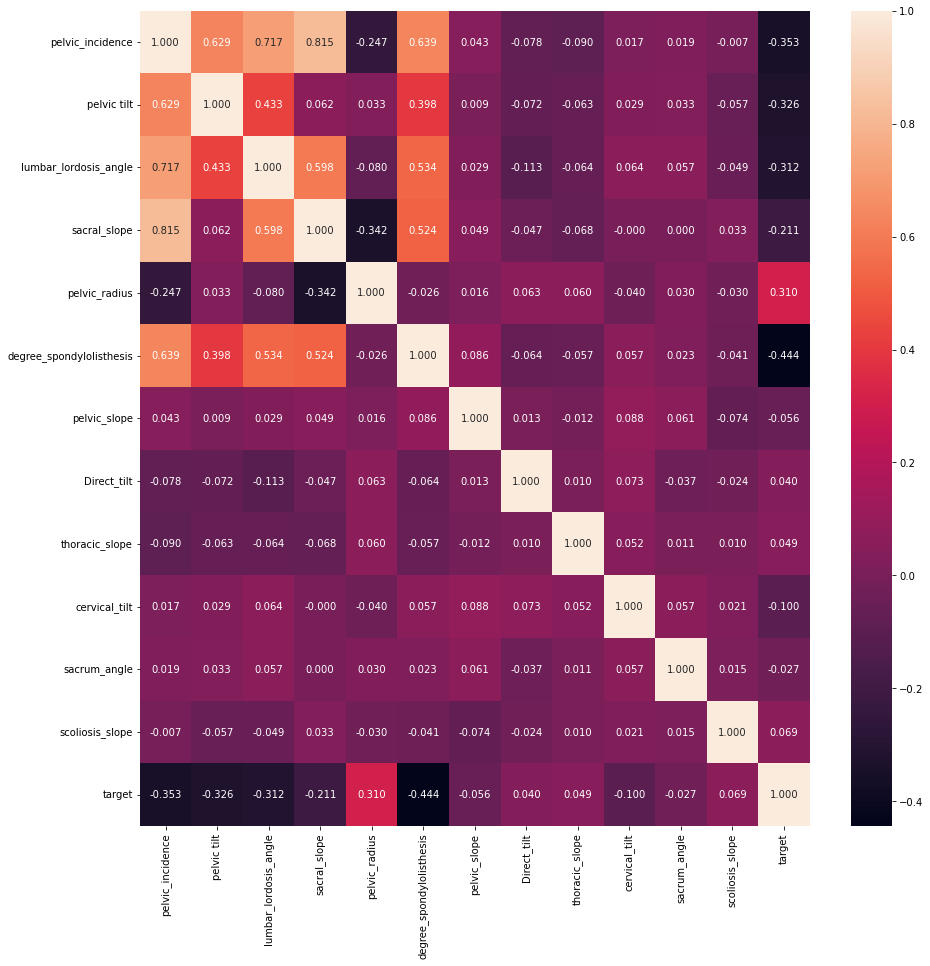

In [19]:
plt.figure(figsize=(15,15))

sns.heatmap(df.corr(),fmt='.3f',annot=True);

In [20]:
import sklearn
from sklearn.preprocessing import StandardScaler
scalar=StandardScaler()
features=['pelvic_incidence','pelvic tilt','lumbar_lordosis_angle','sacral_slope','pelvic_radius','degree_spondylolisthesis',
          'pelvic_slope','Direct_tilt','thoracic_slope','cervical_tilt','sacrum_angle','scoliosis_slope']
df[features]=scalar.fit_transform(df[features])

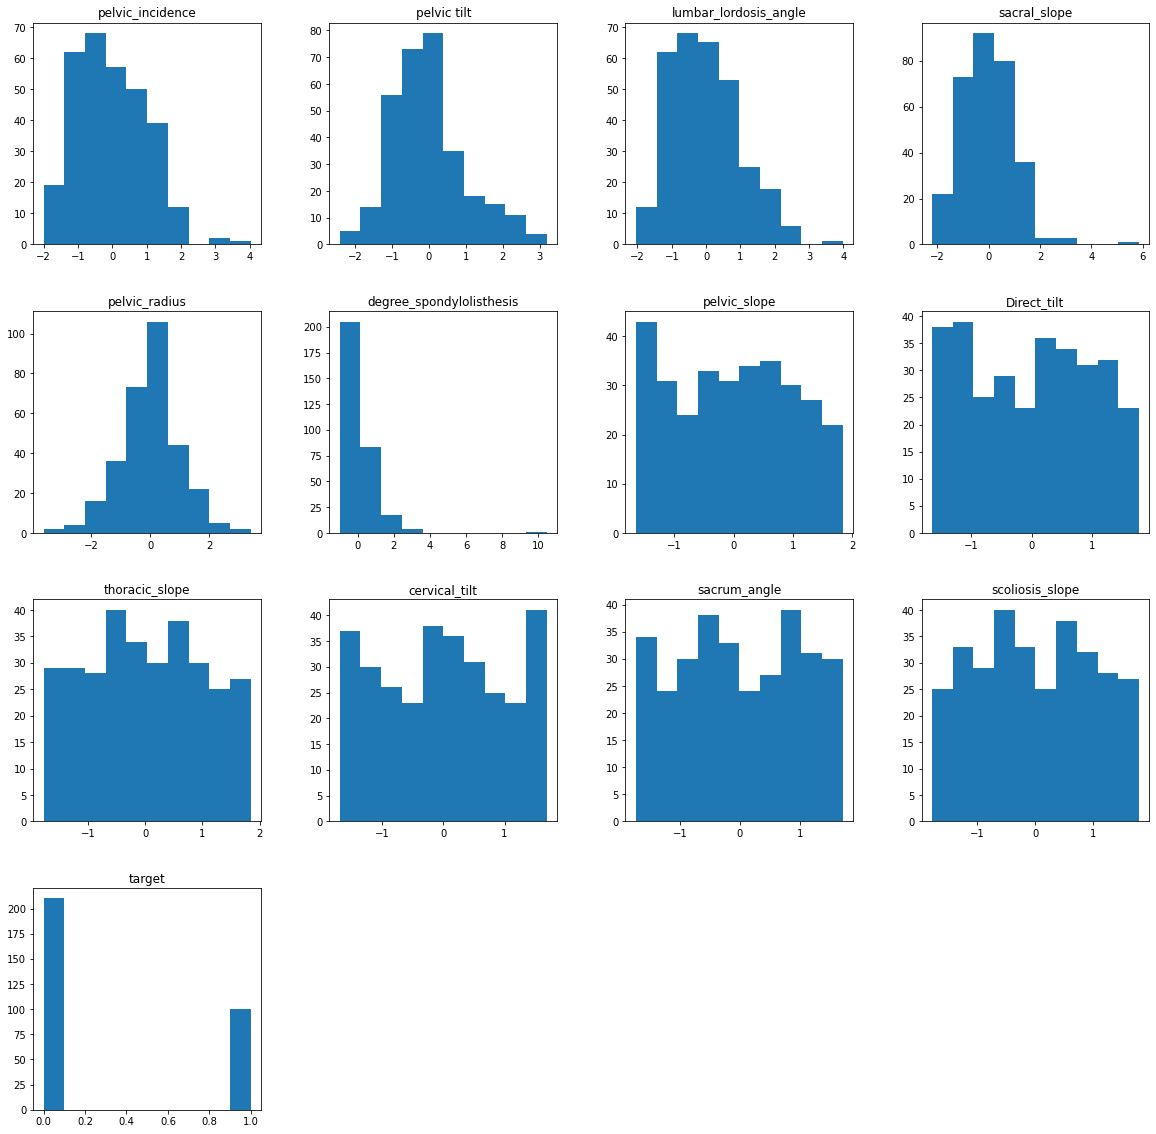

In [21]:
df.hist(grid=False,figsize=(20,20));

In [22]:
df.head()

,pelvic_incidence,pelvic tilt,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,pelvic_slope,Direct_tilt,thoracic_slope,cervical_tilt,sacrum_angle,scoliosis_slope,target
0,0.147086,0.501369,-0.665177,-0.184950,-1.447647,-0.708059,0.951630,-1.015066,0.434293,1.167129,-1.196587,1.712368,0
1,-1.245864,-0.748769,-1.453001,-1.041521,-0.264385,-0.579556,-0.202553,-0.977816,1.316291,1.679551,-0.940325,-0.913941,0
2,0.484370,0.467932,-0.099262,0.273083,-0.897686,-0.795421,0.006694,0.639127,1.302680,1.635969,-1.227178,-0.615686,0
3,0.511390,0.711562,-0.411339,0.126128,-1.207303,-0.402288,-0.363213,0.259554,-0.105211,-0.176157,-1.345020,-0.652989,0
4,-0.626648,-0.789693,-1.274745,-0.215876,-0.733455,-0.490106,0.246670,1.643094,0.851472,-1.059666,-0.190502,-0.069858,0


## Modelling

In [24]:
df=df.sample(frac=1)
X=df.drop('target',axis=1)
Y=df['target']

### RandomForest

In [25]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
np.random.seed(0)
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.2)
from sklearn.ensemble import RandomForestClassifier
rfc_model=RandomForestClassifier()
rfc_model.fit(x_train,y_train)
rfc_train_score=cross_val_score(rfc_model,x_train,y_train,cv=10)
rfc_test_score=cross_val_score(rfc_model,x_test,y_test,cv=10)
(rfc_train_score.mean(),rfc_test_score.mean())

(0.8186666666666668, 0.7761904761904761)

### KNN

In [26]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
np.random.seed(0)
knn_model=KNeighborsClassifier()
knn_model.fit(x_train,y_train)
knn_train_score=cross_val_score(knn_model,x_train,y_train,cv=10)
knn_test_score=cross_val_score(knn_model,x_test,y_test,cv=10)
(knn_train_score.mean(),knn_test_score.mean())


(0.7338333333333333, 0.7261904761904762)

## Logistic regression

In [27]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
np.random.seed(0)
lr_model=LogisticRegression()
lr_model.fit(x_train,y_train)
lr_train_score=cross_val_score(lr_model,x_train,y_train,cv=10)
lr_test_score=cross_val_score(lr_model,x_test,y_test,cv=10)
(lr_train_score.mean(),lr_test_score.mean())

(0.8265, 0.7976190476190477)

In [28]:
dict={"KNN": knn_test_score.mean(),
      "Logistic Regression":lr_test_score.mean(),
      "Random Forest Classifier": rfc_test_score.mean()}
dict

{'KNN': 0.7261904761904762,
 'Logistic Regression': 0.7976190476190477,
 'Random Forest Classifier': 0.7761904761904761}

As we see, we get the highest accuracy of the model using Random Forest Classifer, therefore using hyperparameter tuning

**Using Randomized Search CV**

In [29]:
# Using RandomizedSearchCV
from sklearn.model_selection import RandomizedSearchCV
rfc_rcv={"n_estimators":np.arange(10,1000,50),
         "max_depth":[None,4,7,10],
         "min_samples_split":np.arange(2,10,2),
         "min_samples_leaf":np.arange(2,20,2)}
rfc=RandomizedSearchCV(RandomForestClassifier(),
                       param_distributions=rfc_rcv,
                       n_iter=20,
                       cv=10,
                       verbose=True,
                       n_jobs=-1,
                       random_state=0)
rfc.fit(x_train,y_train)
rfc_train_score=rfc.score(x_train,y_train)
rfc_test_score=rfc.score(x_test,y_test)
(rfc_train_score,rfc_test_score)

Fitting 10 folds for each of 20 candidates, totalling 200 fits


(0.8991935483870968, 0.8709677419354839)

In [30]:
rfc.best_params_

{'n_estimators': 910,
 'min_samples_split': 2,
 'min_samples_leaf': 10,
 'max_depth': 7}

In [31]:
# For more accuracy, using Grid Search CV
from sklearn.model_selection import GridSearchCV
rfc_grid={'n_estimators':[500,600,700,1000],
          'min_samples_split':[4,6,8,10],
          'min_samples_leaf':[6,8,10],
          'max_depth':[4,5,6]}
rfc_gridcv=GridSearchCV(RandomForestClassifier(),
                        cv=10,
                        param_grid=rfc_grid,
                        n_jobs=-1,
                        verbose=2)
rfc_gridcv.fit(x_train,y_train)
rfcgrid_train_score=rfc.score(x_train,y_train)
rfcgrid_test_score=rfc.score(x_test,y_test)
(rfcgrid_train_score,rfcgrid_test_score)

Fitting 10 folds for each of 144 candidates, totalling 1440 fits


(0.8991935483870968, 0.8709677419354839)

In [32]:
import pickle
import warnings
warnings.filterwarnings("ignore")
pickle.dump(rfc_gridcv,open('model.pkl','wb'))
model=pickle.load(open('model.pkl','rb'))

## Evaluation

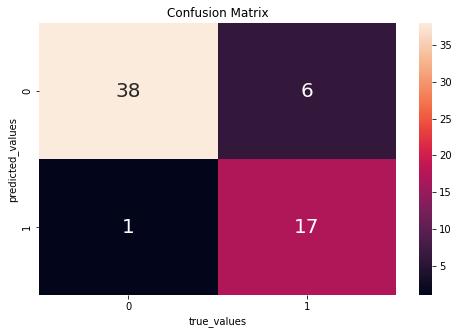

In [33]:
from sklearn.metrics import confusion_matrix
y_preds=rfc_gridcv.predict(x_test)
conf_mat=confusion_matrix(y_test,y_preds)
fig,ax=plt.subplots(figsize=(8,5))
sns.heatmap(conf_mat,annot=True,annot_kws={"size":20})
ax.set(title="Confusion Matrix",ylabel='predicted_values',xlabel='true_values');

### Feature Importance

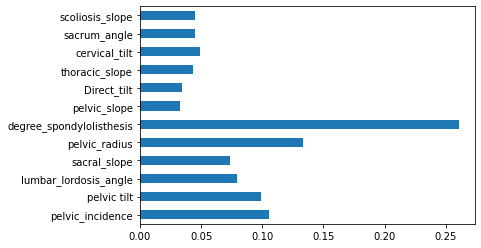

In [34]:
#RandomForest
importance = rfc_model.feature_importances_
# summarize feature importance
# for i,v in enumerate(importance):
# 	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
pd.Series(rfc_model.feature_importances_, index=X.columns).plot(kind='barh') ;